<a href="https://colab.research.google.com/github/ravi9837/My-projects/blob/main/indian%20GDP%5Cindian_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w 
w.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/India_GDP_Data.csv')

In [ ]:
df.head()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
1,2020,2667.69,1933,-6.60
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
4,2017,2651.47,1981,6.80


In [ ]:
df.shape

(61, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                61 non-null     int64  
 1   GDP_In_Billion_USD  61 non-null     float64
 2   Per_Capita_in_USD   61 non-null     int64  
 3   Percentage_Growth   61 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [ ]:
df.describe()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
count,61.000000,61.000000,61.000000,61.000000
mean,1991.000000,709.889016,611.163934,5.089344
std,17.752934,870.169692,618.757227,3.282711
min,1961.000000,39.230000,85.000000,-6.600000
25%,1976.000000,102.720000,163.000000,3.740000
50%,1991.000000,296.040000,346.000000,5.710000
75%,2006.000000,940.260000,807.000000,7.550000
max,2021.000000,3173.400000,2277.000000,9.630000


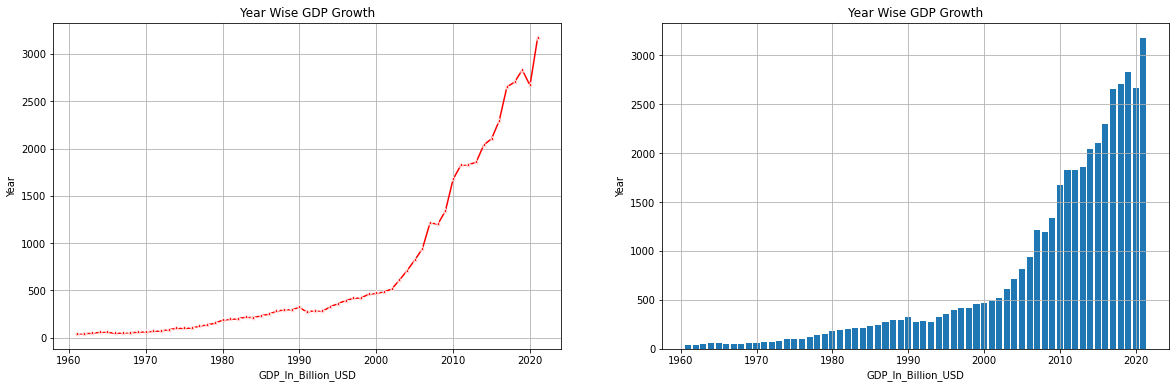

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.lineplot(df.Year , df.GDP_In_Billion_USD,marker = "*" ,color = "r")
plt.title("Year Wise GDP Growth")
plt.xlabel("GDP_In_Billion_USD")
plt.ylabel("Year")
plt.grid()
plt.subplot(1,2,2)
plt.bar(df.Year , df.GDP_In_Billion_USD)
plt.title("Year Wise GDP Growth")
plt.xlabel("GDP_In_Billion_USD")
plt.ylabel("Year")
plt.grid()

plt.show()

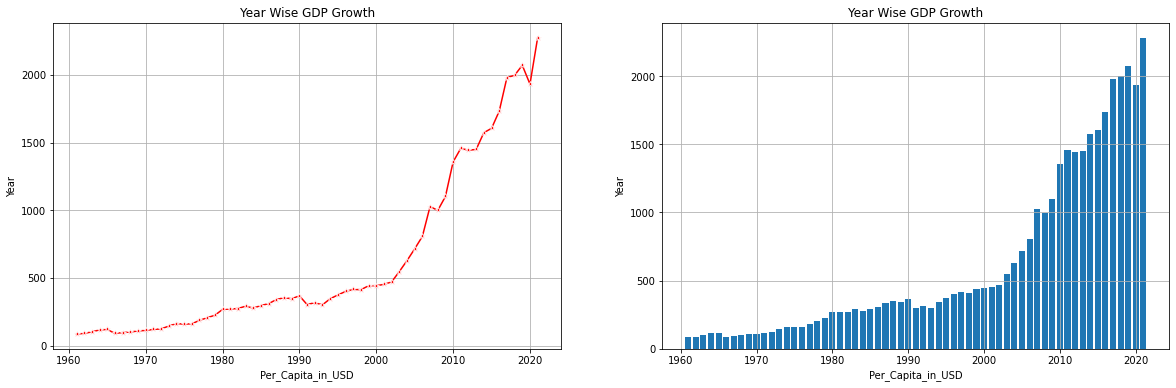

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.lineplot(df.Year , df.Per_Capita_in_USD,marker = "*" ,color = "r")
plt.title("Year Wise GDP Growth")
plt.xlabel("Per_Capita_in_USD")
plt.ylabel("Year")
plt.grid()
plt.subplot(1,2,2)
plt.bar(df.Year , df.Per_Capita_in_USD)
plt.title("Year Wise GDP Growth")
plt.xlabel("Per_Capita_in_USD")
plt.ylabel("Year")
plt.grid()
plt.show()

Text(0, 0.5, 'Per_Capita_in_USD')

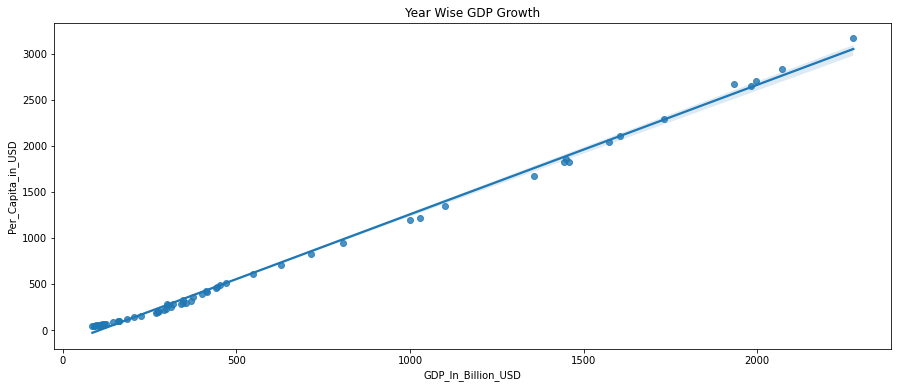

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(df.Per_Capita_in_USD , df.GDP_In_Billion_USD )
#plt.colorbar()
plt.title("Year Wise GDP Growth")
plt.xlabel("GDP_In_Billion_USD")
plt.ylabel("Per_Capita_in_USD")

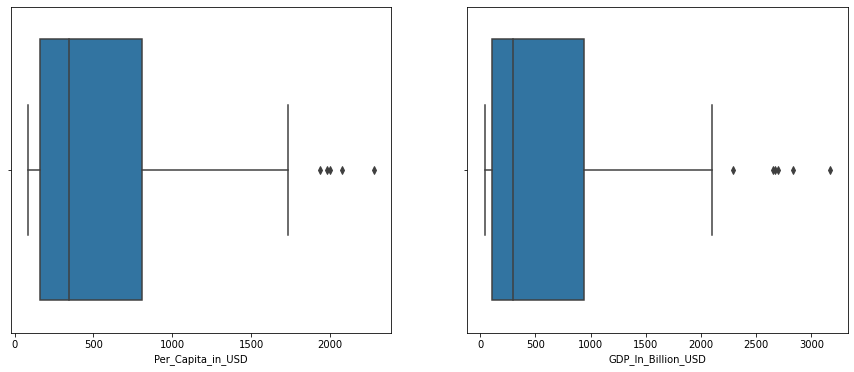

In [ ]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot( df.Per_Capita_in_USD )
plt.subplot(1,2,2)
sns.boxplot(df.GDP_In_Billion_USD)
plt.show()

In [ ]:
df.corr()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
Year,1.000000,0.851546,0.869831,0.276549
GDP_In_Billion_USD,0.851546,1.000000,0.998592,0.154507
Per_Capita_in_USD,0.869831,0.998592,1.000000,0.172981
Percentage_Growth,0.276549,0.154507,0.172981,1.000000


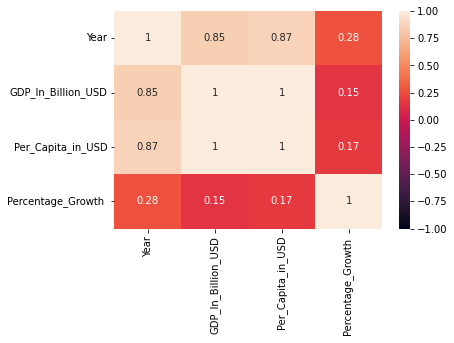

In [ ]:
sns.heatmap(df.corr() , annot = True , vmin=-1) 
plt.show()

In [ ]:
#pridictive system

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = df.drop('Per_Capita_in_USD' ,axis = 1)
Y = df.Per_Capita_in_USD

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 10)

In [ ]:
X_train.shape

(48, 3)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.coef_

array([2.56748335, 0.66577507, 1.71655331])

In [ ]:
model.intercept_

-4979.311521847179

In [ ]:
# prediction on train
X_train_pred = model.predict(X_train)


In [ ]:
# prediction on train
X_test_pred = model.predict(X_test)


In [ ]:
error_train = mean_squared_error(X_train_pred,Y_train)
error_train**0.5

22.916835557884674

In [ ]:
# model accuracy
error_test = mean_squared_error(X_test_pred,Y_test)
error_test**0.5

22.844921019512906

In [ ]:
import joblib
joblib.dump( model,'GDP.dat')

['GDP.dat']